In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
import requests, json

**<h2>Load Data from server using API CALL</h2>**

In [2]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

response = requests.get("http://178.128.34.120:8000/api/weather")
response = json.loads(response.text)
SensorData = pd.json_normalize(response)
SensorData.head()

# #define number of columns 

,date,time,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
SensorData.dtypes

date             object
time             object
co_gt           float64
pt08_s1_co      float64
nmhc_gt         float64
c6h6_gt         float64
pt08_s2_nmhc    float64
nox_gt          float64
pt08_s3_nox     float64
no2_gt          float64
pt08_s4_no2     float64
pt08_s5_o3      float64
t               float64
rh              float64
ah              float64
dtype: object

In [4]:
#drop end rows with nan values
SensorData.dropna(how='all',inplace=True)
#drop RH nan rows
SensorData.dropna(thresh=10,axis=0,inplace=True)

In [5]:
# data dimension 
SensorData.shape

(9357, 15)

**<h2>Data Statistics</h2>**

In [6]:
SensorData.describe()

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


**<h2>Data Cleaning</h2>**

In [7]:
print('Number of missing values:\n',SensorData.shape[0]-SensorData.count())

Number of missing values:
 date            0
time            0
co_gt           0
pt08_s1_co      0
nmhc_gt         0
c6h6_gt         0
pt08_s2_nmhc    0
nox_gt          0
pt08_s3_nox     0
no2_gt          0
pt08_s4_no2     0
pt08_s5_o3      0
t               0
rh              0
ah              0
dtype: int64


In [8]:
SensorData['date']=pd.to_datetime(SensorData.date, format='%Y-%m-%d')   #Formating date column

In [9]:
# set the index as date
SensorData.set_index('date',inplace=True)

In [10]:
SensorData['month']=SensorData.index.month     #Create month column 
SensorData.reset_index(inplace=True)

In [11]:
SensorData.drop('nmhc_gt',axis=1,inplace=True)    #dropping a column

In [12]:
SensorData['co_gt']=SensorData['co_gt'].fillna(SensorData.groupby(['month'])['co_gt'].transform('mean'))
SensorData['nox_gt']=SensorData['nox_gt'].fillna(SensorData.groupby(['month'])['nox_gt'].transform('mean'))
SensorData['no2_gt']=SensorData['no2_gt'].fillna(SensorData.groupby(['month'])['no2_gt'].transform('mean'))

In [13]:
print('Unprocessed missing value:',SensorData.shape[0]-SensorData.count() )

Unprocessed missing value: date            0
time            0
co_gt           0
pt08_s1_co      0
c6h6_gt         0
pt08_s2_nmhc    0
nox_gt          0
pt08_s3_nox     0
no2_gt          0
pt08_s4_no2     0
pt08_s5_o3      0
t               0
rh              0
ah              0
month           0
dtype: int64


**<h2>HeatMap to see co-relation between variables</h2>**

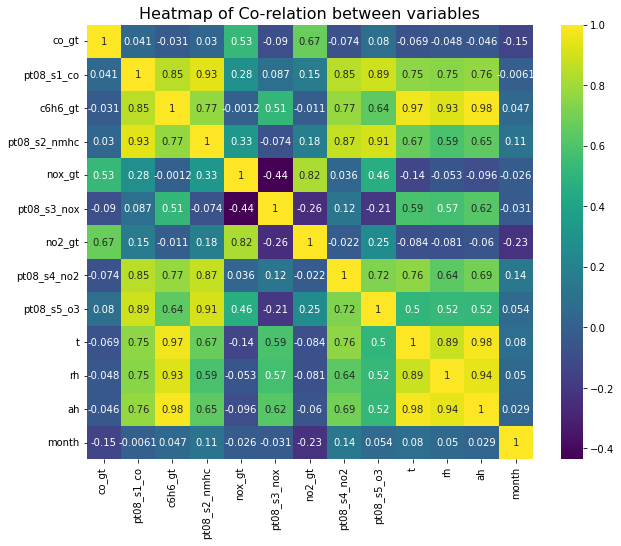

In [14]:
#Using heatmap to see co-relation between variables
sns.heatmap(SensorData.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of Co-relation between variables',fontsize=16)
plt.show()

**<h2>LM Plot to find linearity between RH output and input features</h2>**

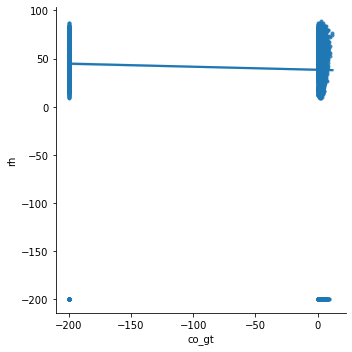

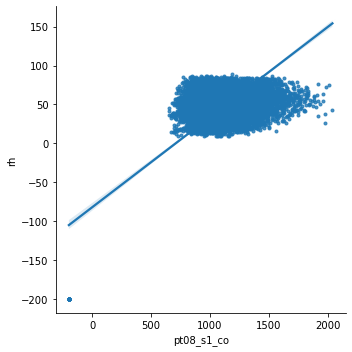

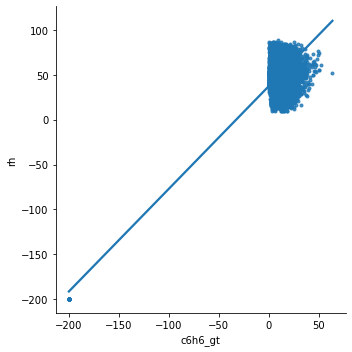

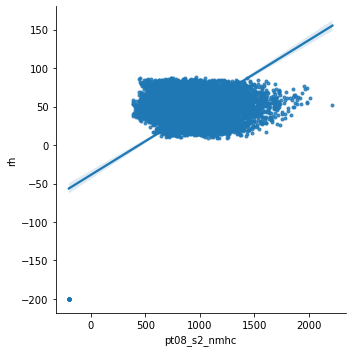

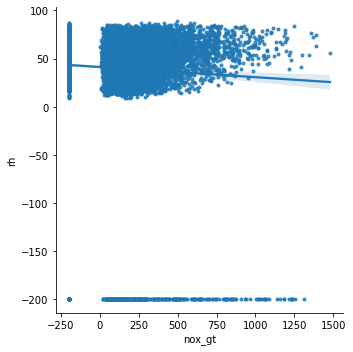

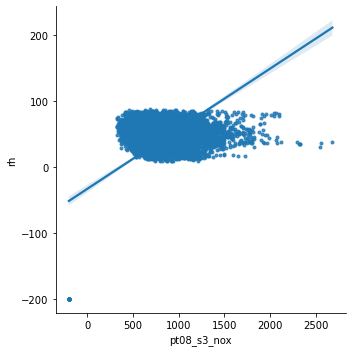

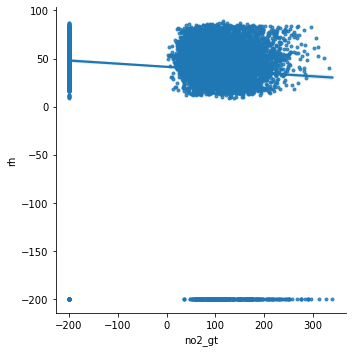

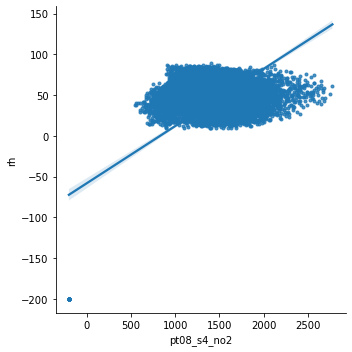

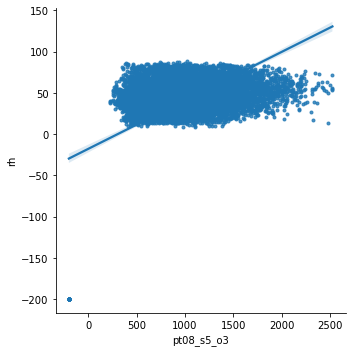

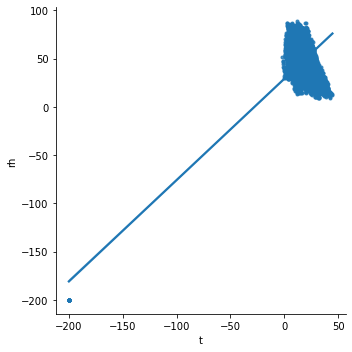

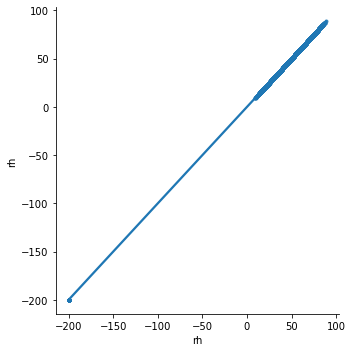

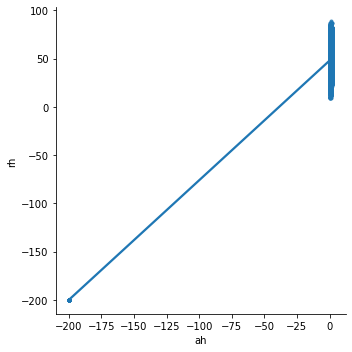

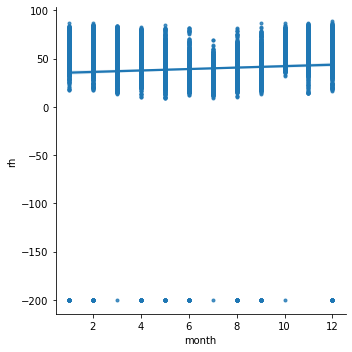

In [15]:
#plot all X-features against the output variable RH
col_=SensorData.columns.tolist()[2:]
for i in SensorData.columns.tolist()[2:]:
    sns.lmplot(x=i,y='rh',data=SensorData,markers='.')

**<h2>Linear Regression</h2>**

In [16]:
from sklearn.preprocessing import StandardScaler                       #import normalisation package
from sklearn.model_selection import train_test_split                   #import train test split
from sklearn.linear_model import LinearRegression                      #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error      #import mean squared error and mean absolute error

In [17]:
X=SensorData[col_].drop('rh',1)     #X-input features
y=SensorData['rh'] 

C:\Users\dm\AppData\Local\Temp/ipykernel_24744/4116925222.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=SensorData[col_].drop('rh',1)     #X-input features


In [18]:
ss=StandardScaler()

In [19]:
X_std=ss.fit_transform(X) 

In [20]:
#split the data into train and test with test size 25% and train size as 75%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.25, random_state=42)


In [21]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (7017, 12)
Test data size: (2340, 12)


In [22]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train) 

In [23]:
print('Intercept:',lr_model.intercept_)
print('--------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))


Intercept: 39.4978445018805
--------------------------
Slope:


[('co_gt', -0.050552974487292096),
 ('pt08_s1_co', 5.460005479987558),
 ('c6h6_gt', -32.29353147030337),
 ('pt08_s2_nmhc', -21.74093122990134),
 ('nox_gt', 5.480453726805538),
 ('pt08_s3_nox', -8.058588752873655),
 ('no2_gt', -3.8813556999248435),
 ('pt08_s4_no2', 26.021340203890357),
 ('pt08_s5_o3', -0.6526096849118637),
 ('t', -89.59627309624925),
 ('ah', 165.4411874087669),
 ('month', 4.1101007322102365)]

In [24]:
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 7.36510267376584


**<h2>Decision Tree</h2>**

In [25]:
from sklearn.tree import DecisionTreeRegressor       
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv
dt_one_reg=DecisionTreeRegressor()

In [26]:
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test) 

In [27]:
#calculate RMSE
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 1.2364687086674386


**<h2>Random Forest</h2>**

In [28]:
from sklearn.ensemble import RandomForestRegressor           
rf_reg=RandomForestRegressor()

In [29]:
rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)

In [30]:
#Calculate RMSE
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 0.5759033476032196


**<h2>Support Vector Machine</h2>**

In [31]:
from sklearn.svm import SVR          
sv_reg=SVR()

In [32]:
sv_model=sv_reg.fit(X_train,y_train)

In [33]:
y_pred_sv=sv_model.predict(X_test) 

In [34]:
#Calculate RMSE of SVR
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))


RMSE of SVR model: 15.575448348389896
